In [16]:
from fastai.vision.all import *

In [17]:
dir_path = 'data/images/'
train_path='data/images/train/'

In [18]:
classes=['0','1']

In [19]:
roads=DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms=RandomResizedCrop(460),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [20]:
#path=Path(dir_path)
dls=roads.dataloaders(train_path, bs=32)

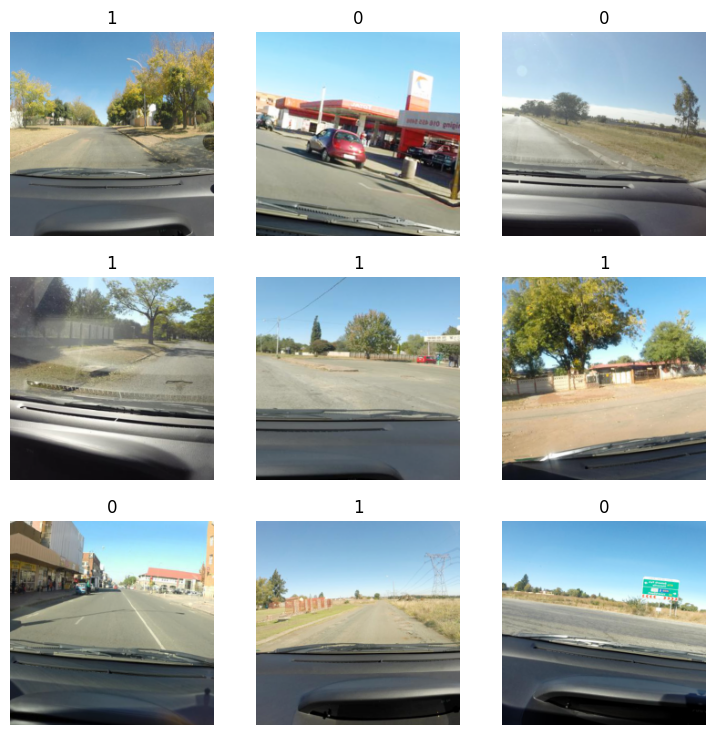

In [21]:
dls.show_batch(max_n=9)

In [24]:
learn = vision_learner(dls, resnet34, pretrained=True, metrics=[accuracy, error_rate]).to_fp16()


In [25]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.937751,0.486149,0.801242,0.198758,02:13
1,0.647196,0.298988,0.873292,0.126708,02:22
2,0.486699,0.273989,0.891925,0.108075,02:33
3,0.407108,0.248421,0.900621,0.099379,02:49
4,0.386251,0.243854,0.900621,0.099379,02:48


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
#comfirming training accuracy
predictions, targets = learn.get_preds(ds_idx=1)  

accuracy = accuracy_score(targets, predictions.argmax(dim=-1))

print("Test Accuracy:", accuracy)


Test Accuracy: 0.9006211180124224


In [28]:
learn.save('saved-1')

Path('models/saved-1.pth')

In [29]:
learn.unfreeze()

SuggestedLRs(valley=0.0002290867705596611)

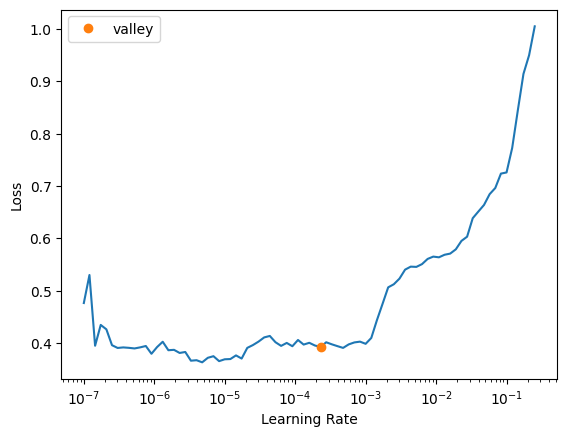

In [30]:

learn.lr_find()

In [31]:
learn.fit_one_cycle(4, lr_max = slice (2e-4,2e-3))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.451309,0.309035,0.899379,0.100621,02:53
1,0.302772,0.327375,0.878261,0.121739,03:21
2,0.254361,0.180098,0.939130,0.060870,03:18
3,0.191788,0.139972,0.949068,0.050932,02:46


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

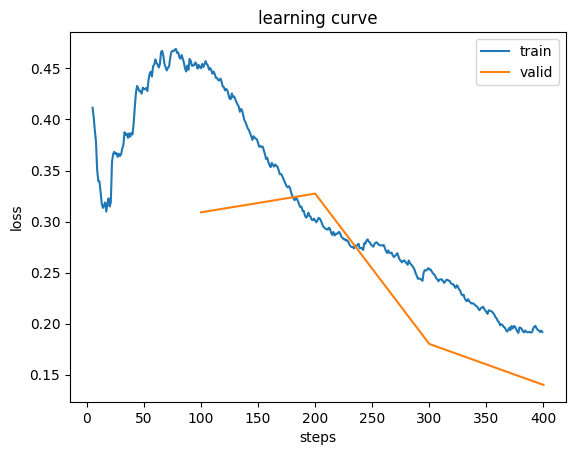

In [32]:
learn.recorder.plot_loss()

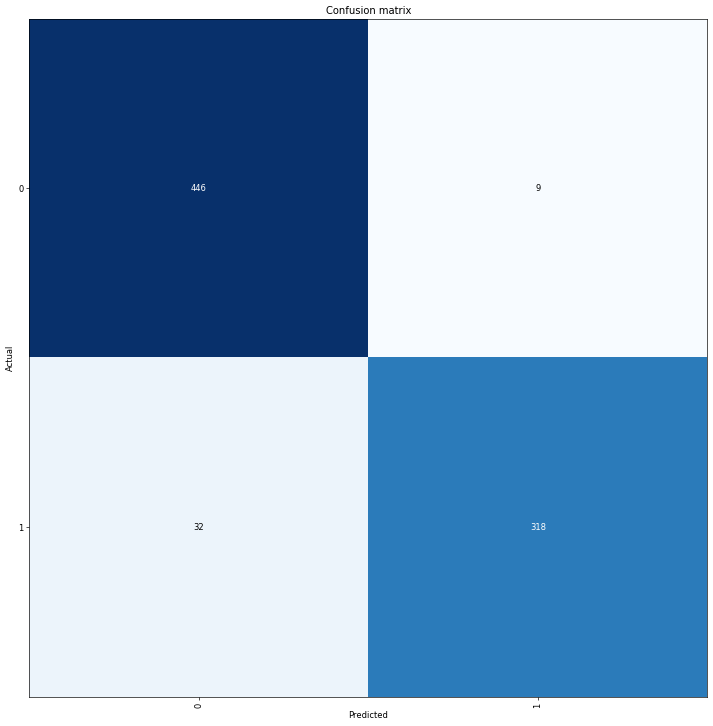

In [33]:
results = ClassificationInterpretation.from_learner(learn)
results.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [34]:
results.most_confused(min_val=3)

[('1', '0', 32), ('0', '1', 9)]

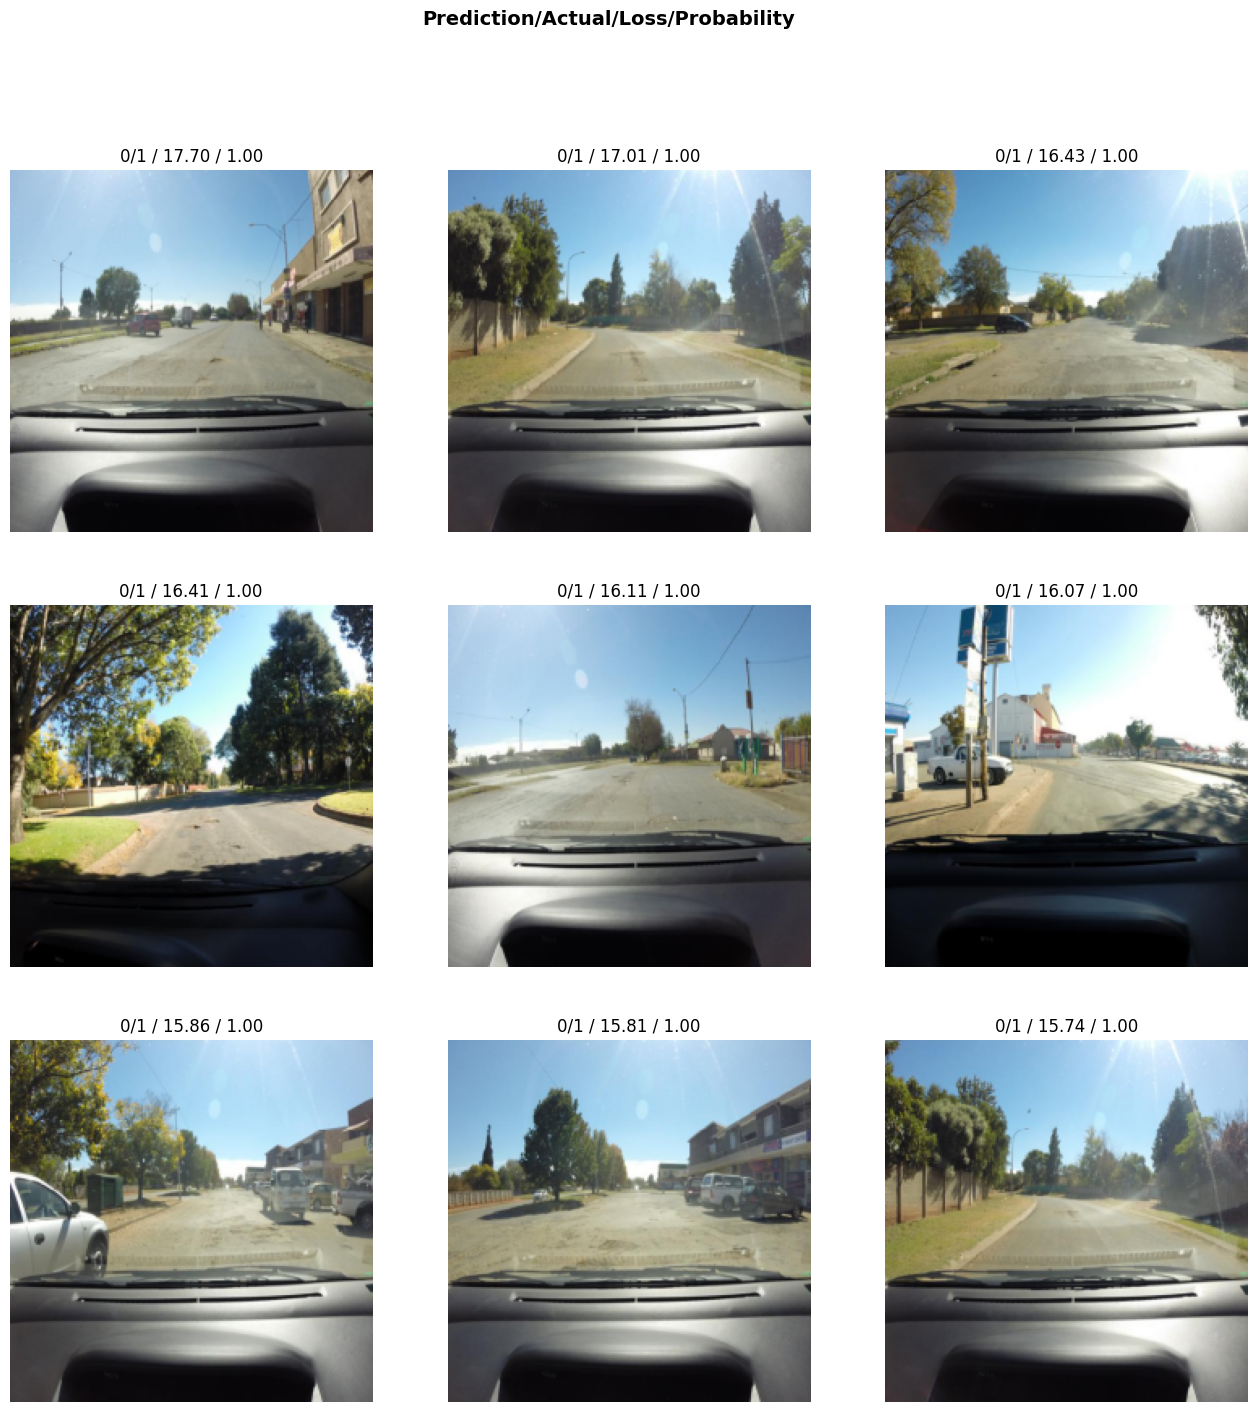

In [ ]:
results.plot_top_losses(9, figsize= (16,16))

In [ ]:
# Alternative test optimization

# Unfreeze and fine-tune the model
learn.unfreeze()
learn.fit_one_cycle(10, lr_max=slice(1e-6, 1e-4))

# Evaluate the updated model accuracy
predictions, targets = learn.get_preds(ds_idx=1)
accuracy = accuracy_score(targets, predictions.argmax(dim=-1))
print("Updated Test Accuracy:", accuracy)